### Importação dos dados



In [105]:
import pandas as pd


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


Nesta primeira análise, é calculada[link text](https://) o faturamento total de cada loja. Somando os valores da coluna Preço de cada loja para estimar o faturamento

#1. Análise do faturamento


In [106]:
def formatar_reais(valor): #função para formatar em reais o valor do faturamento
    """Formata valores em R$ com separador de milhar e vírgula decimal."""
    return f'{valor:.2f}'.replace(",", "X").replace(".", ",").replace("X", ".")

In [107]:
#arredondamento do valor de faturamento para duas casas decimais após a vírgula
faturamento_loja1 = round(sum(loja['Preço']),2)
faturamento_loja2 = round(sum(loja2['Preço']),2)
faturamento_loja3 = round(sum(loja3['Preço']),2)
faturamento_loja4 = round(sum(loja4['Preço']),2)

# 2. Vendas por Categoria


Neste passo, deve calcular a quantidade de produtos vendidos por categoria em cada loja. A ideia é agrupar os dados por categoria e contar o número de vendas de cada tipo, mostrando as categoria mais populares de cada loja


In [108]:
def quantidade_vendas(lista, string): #vendas que pode ser por categoria ou por produto
  quantidade_vendas = {} #inicia um dicionário vazio

  for produto in lista[string]: #string pode ser categoria ou produto
    if(produto in quantidade_vendas): #Se o produto ou categoria existe no dicionário
      quantidade_vendas[produto] += 1 #soma-se + 1
    else: #se a categoria ou produto ainda não foi adicionada no adicionario
      quantidade_vendas[produto] = 1 #soma recebe 1

  return quantidade_vendas #retorna um dicionario com as quantidades de produtos ou categoria vendidos na loja

In [109]:
qtdVendasLoja1 = quantidade_vendas(loja, 'Categoria do Produto')
qtdVendasLoja2 = quantidade_vendas(loja2, 'Categoria do Produto')
qtdVendasLoja3 = quantidade_vendas(loja3, 'Categoria do Produto')
qtdVendasLoja4 = quantidade_vendas(loja4, 'Categoria do Produto')

In [110]:
# ordenar por ordem alfabética os produtos por categoria
qtdVendasLoja1 =  {k: qtdVendasLoja1[k] for k in sorted(qtdVendasLoja1)}
qtdVendasLoja2 = {k: qtdVendasLoja2[k] for k in sorted(qtdVendasLoja2)}
qtdVendasLoja3 =  {k: qtdVendasLoja3[k] for k in sorted(qtdVendasLoja3)}
qtdVendasLoja4 =  {k: qtdVendasLoja4[k] for k in sorted(qtdVendasLoja4)}

# 3. Média de Avaliação das Compras dos Clientes


In [111]:
def avaliacaoClientes(lista):
  soma = sum(lista['Avaliação da compra'])
  media = soma / len(lista['Avaliação da compra'])
  print(media)

In [112]:
avaliacao_Cliente_loja1 = avaliacaoClientes(loja) #loja 1
avaliacao_Cliente_loja2 = avaliacaoClientes(loja2) #loja 2
avaliacao_Cliente_loja3 = avaliacaoClientes(loja3) #loja 3
avaliacao_Cliente_loja4 = avaliacaoClientes(loja4) #loja 4

3.976685036032217
4.037303942348453
4.048325561678677
3.9957591178965224


# 4. Produtos Mais e Menos Vendidos

In [113]:
def produtoMaiseMenosVendidos(loja, string): #produto mais popular
  venda_produtos = quantidade_vendas(loja, string) #pega a quantidade de produtos vendidos por categoria
  maior_produto = max(venda_produtos, key = venda_produtos.get) #verifica qual categoria vendeu mais
  menor_produto = min(venda_produtos, key = venda_produtos.get) #verifica qual categoria vendeu mais

  return maior_produto,menor_produto

# 5. Frete Médio por Loja


In [114]:
def custoFrete(lista):
  soma = sum(lista['Frete'])
  media = soma / len(lista['Frete'])
  return media

# Gráficos bibliotecas

In [115]:
!pip install numpy==1.23.5

In [116]:
# Instalando a biblioteca matplotlib pelo pip
!pip install matplotlib

In [117]:
import matplotlib.pyplot as plt

In [118]:
import numpy as np

#Gráfico de dispersão para Vendas por Categoria em cada loja

In [119]:
def VendasPorCategoria():
  lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
  categorias = ['brinquedos','eletrodomesticos','eletronicos','esporte e lazer','instrumentos musicais','livros','moveis','utilidades domesticas']
  categoriasloja1 = list(qtdVendasLoja1.values()) #pega somente o valor de vendas por categoria da loja
  categoriasloja2 = list(qtdVendasLoja2.values())
  categoriasloja3 = list(qtdVendasLoja3.values())
  categoriasloja4 = list(qtdVendasLoja4.values())


  x = np.arange(len(categorias))

  # Plotando gráfico de dispersão
  plt.scatter(x - 0.1, categoriasloja1, color='blue', label='Loja 1', s=100)  # Loja 1
  plt.scatter(x + 0.1, categoriasloja2, color='green', label='Loja 2', s=100)  # Loja 2
  plt.scatter(x - 0.1, categoriasloja3, color='red', label='Loja 3', s=100)    # Loja 3
  plt.scatter(x + 0.1, categoriasloja4, color='orange', label='Loja 4', s=100) # Loja 4

  # Eixos e rótulos
  plt.xticks(x, categorias, rotation=45)
  plt.ylabel('Quantidade de Vendas')
  plt.title('Vendas por Categoria e Loja')
  plt.legend()

  plt.tight_layout()
  plt.show()


#Gráfico de barras para o faturamento de cada loja

In [120]:
def grafico_barras():
  faturamento_lojas =  [faturamento_loja1, faturamento_loja2, faturamento_loja3,faturamento_loja4]
  lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

  plt.bar(x = lojas, height = faturamento_lojas, width= 0.3, color='skyblue')
  plt.ylim(1300000, 1550000)  # Limita entre 1.3 milhão e 1.55 milhão
  plt.xlabel('Lojas')
  plt.tight_layout()
  plt.ylabel('Faturamento em R$')
  plt.title('Faturamento por loja')
  for i, valor in enumerate(faturamento_lojas):
      plt.text(i, valor, f'R${valor:,.0f}'.replace(',', '.'), ha='center')

#Gráfico para verificar a produto mais e menos vendido

In [121]:
def MenoreMaiorProduto(loja_escolha,loja_text):
  maior_produto, menor_produto = produtoMaiseMenosVendidos(loja_escolha, 'Produto')
  qtd_produtos_loja1 = quantidade_vendas(loja_escolha, 'Produto')
  valores = [qtd_produtos_loja1[menor_produto], qtd_produtos_loja1[maior_produto]]
  labels = [f'Menos vendido: {menor_produto}', f'Mais vendido: {maior_produto}']

  plt.pie(valores, labels=labels, autopct='%1.1f%%', startangle=90, colors=['orange', 'green'])
  plt.title(f'Comparação: Produto Mais e Menos Vendido da {loja_text}')
  plt.axis('equal')
  plt.show()

# Gráfico para verificar a avaliação dos clientes

In [122]:
def plotCustoMedioFrete():
  lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
  custoFreteLoja1 = custoFrete(loja)
  custoFreteLoja2 = custoFrete(loja2)
  custoFreteLoja3 = custoFrete(loja3)
  custoFreteLoja4 = custoFrete(loja4)

  custos_frete = [custoFreteLoja1, custoFreteLoja2,custoFreteLoja3, custoFreteLoja4]

  cores = []
  for custo in custos_frete:
      if custo == max(custos_frete):
          cores.append('green')    # maior custo
      elif custo == min(custos_frete):
          cores.append('red')  # menor custo
      else:
          cores.append('gray')   # custo médio

  # Plot
  plt.figure(figsize=(8, 5))
  plt.barh(lojas, custos_frete, color=cores)
  plt.xlabel('Custo Médio de Frete (R$)')
  plt.title('Custo Médio de Frete por Loja')

  # Mostrar valores no final das barras
  for i, v in enumerate(custos_frete):
      plt.text(v + 0.1, i, f'R${v:.2f}', va='center')

  plt.xlim(30, 36)  # Zoom para facilitar a comparação
  plt.tight_layout()
  plt.show()


#Relatório Final sobre o desempenho das lojas

## Introdução

Este relatório tem como objetivo apresentar uma análise detalhada dos dados de quatro lojas pertencentes ao Sr. João. A finalidade da análise é apoiar a tomada de decisão sobre qual loja deve ser vendida, considerando o alinhamento com os objetivos estratégicos do proprietário.

A investigação foi conduzida com base nos seguintes aspectos:
- Faturamento total de cada loja;
- Categorias de produtos mais e menos vendidas;
- Média das avaliações de clientes por loja;
- Produtos com maior e menor volume de vendas;
- Frete médio praticado por loja.

## Faturamento total de cada loja

De acordo com o gráfico "Faturamento por loja" indicado abaixo conclui-se que:
- **Loja 1** possui o maior faturamento;
- **Loja 4** apresenta o menor faturamento entre todas as lojas;
- A diferença de lucro entre a maior e a menor gira em torno de 150 mil


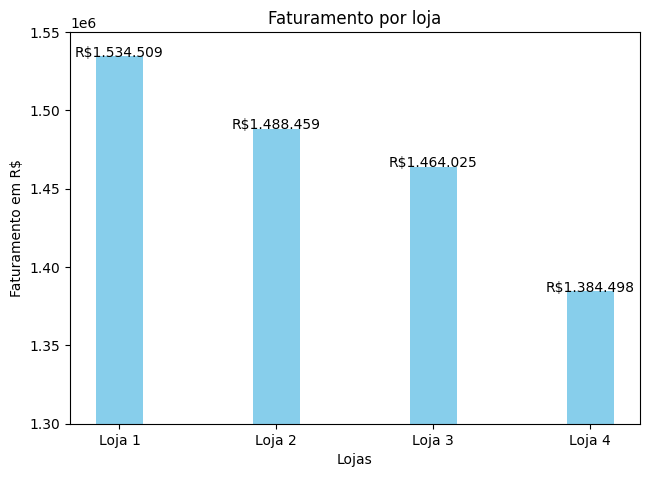

In [123]:
grafico_barras()

## Visualização de vendas por categoria de cada loja

O gráfico abaixo "Vendas por categoria e Loja" evidencia uma forte demanda por **Móveis** e **Eletrônicos** em todas as lojas, com um total de vendas superior a 400 unidades nessas categorias. A categoria mais vendida em todas as lojas é **Móveis**, o que indica uma oportunidade estratégica para investir em produtos de maior qualidade e variedade nesse segmento, visando um aumento no retorno financeiro.

Observa-se também que as categorias com menor volume de vendas são **Utilidades Domésticas** e **Instrumentos Musicais**. Isso sugere que uma possível redução nos custos desses produtos pode contribuir para melhorar a rentabilidade das lojas.


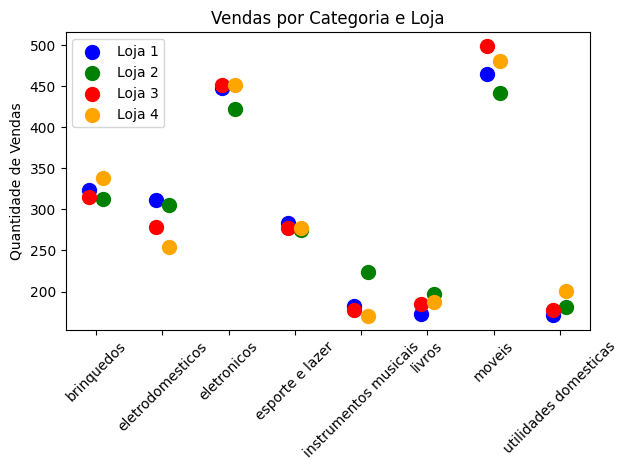

In [124]:
VendasPorCategoria()

## Custo de frete por Loja

O custo médio de frete mais alto entre todas as lojas é o da **Loja 1**, com valor aproximado de R$ 34,69, o que contribui para uma margem de lucro maior. Por outro lado, a **Loja 4** apresenta o menor custo médio de frete, em torno de R$ 31,28, o que pode estar associado a um lucro mais baixo em comparação com as demais.


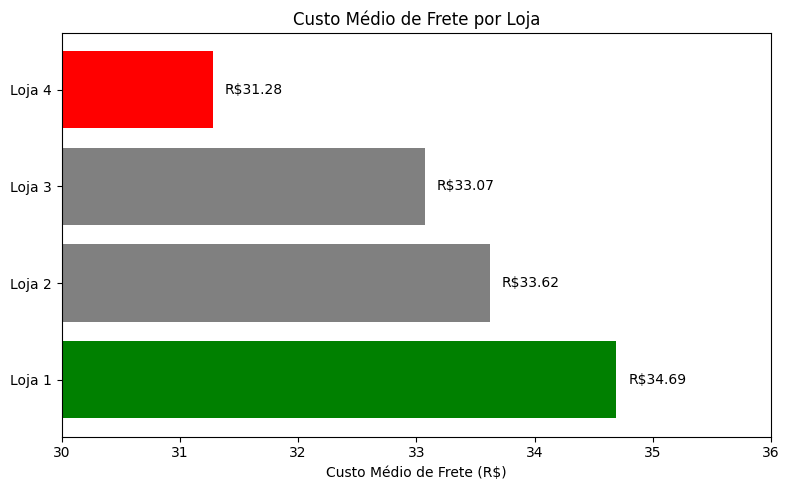

In [125]:
plotCustoMedioFrete()

## Conclusão

Com base nos dados de faturamento, a loja indicada para ser vendida é a **Loja 4**, pois apresenta um desempenho significativamente inferior em comparação com as demais. Apesar do custo de frete ser pago pelos clientes, o valor médio de frete da Loja 4 é baixo, o que pode estar contribuindo para uma margem de lucro reduzida em relação às outras lojas.

